In [1]:
import glob
import json
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import wordnet as wn

from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/pmh864/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## ImageNet 1k Labels

In [1]:
!wget https://gist.githubusercontent.com/Juanvulcano/381b740a4eb8d46229b31fbdbdce01b1/raw/b49d3828a656eb41bc07426b5f7416722604a6c2/imagenet_label_to_wordnet_synset.json

--2021-04-22 10:02:12--  https://gist.githubusercontent.com/Juanvulcano/381b740a4eb8d46229b31fbdbdce01b1/raw/b49d3828a656eb41bc07426b5f7416722604a6c2/imagenet_label_to_wordnet_synset.json
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139568 (136K) [text/plain]
Saving to: ‘imagenet_label_to_wordnet_synset.json’

imagenet_label_to_w 100%[===================>] 136.30K   620KB/s    in 0.2s    

2021-04-22 10:02:13 (620 KB/s) - ‘imagenet_label_to_wordnet_synset.json’ saved [139568/139568]



In [2]:
# Load ImageNet label to WordNet mapping
j = json.load(open("imagenet_label_to_wordnet_synset.json"))
j["610"]

{'id': '03595614-n',
 'label': 'jersey, T-shirt, tee shirt',
 'uri': 'http://wordnet-rdf.princeton.edu/wn30/03595614-n'}

In [6]:
labels1k_ix2id = {int(k): v['id'] for k, v in j.items()}

labels1k_min_depths = []
labels1k_max_depths = []
for wid in labels1k_ix2id.values():
    syn = wn.of2ss(wid)
    labels1k_min_depths.append(syn.min_depth())
    labels1k_max_depths.append(syn.max_depth())

In [7]:
lang = "1k Labels"
labels1k_df = pd.DataFrame()
labels1k_df["lang"] = [lang] * (len(labels1k_min_depths) + len(labels1k_max_depths))
labels1k_df["Depth Type"] = ["min"] * len(labels1k_min_depths) + ["max"] * len(labels1k_max_depths) 
labels1k_df["Depth"] = labels1k_min_depths + labels1k_max_depths

(0.0, 20.287620205804775)

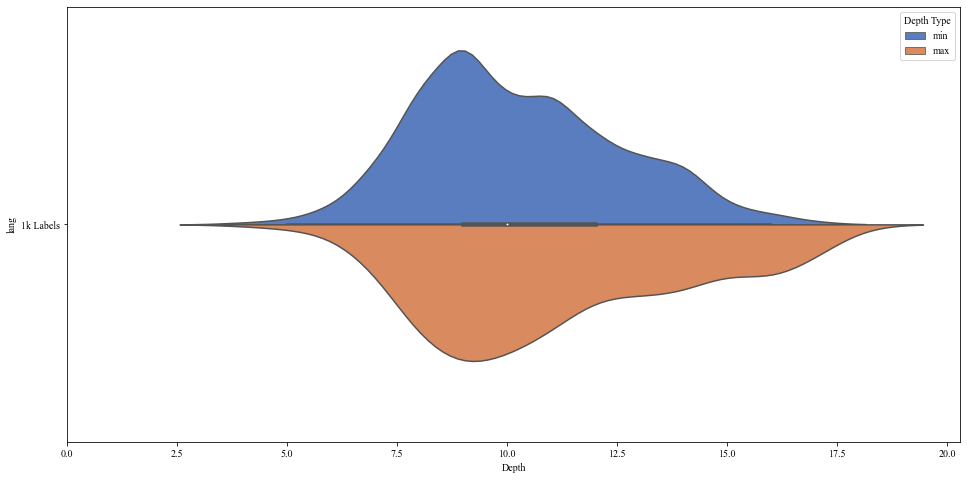

In [8]:
f, ax = plt.subplots(figsize=(16,8))
sns.violinplot(y="lang", x="Depth", hue="Depth Type", data=labels1k_df, palette="muted", split=True, ax=ax, orient="h")
ax.set_xlim(0)

## ImageNet subset from Ordonez+ (ICCV'13)

In [9]:
# Get ImageNet synsets subset
url = r'http://www.cs.virginia.edu/~vicente/entrylevel/data/translation-text-based-iccv2013.html'

tables = pd.read_html(url)
df = tables[0]
df = df.drop(columns=[0])
df = df.rename(columns={1: "WNID", 2: "Input", 3: "Text-based", 4: "Human-based (Mechanical Turk)"})
df = df.iloc[1:]
df.head()

,WNID,Input,Text-based,Human-based (Mechanical Turk)
1,n00444937,"snorkeling, snorkel diving",swimming,snorkel
2,n00446980,archery,archery,bow
3,n00466712,miniature golf,golf,golf
4,n00467536,"shuffleboard, shovelboard",game,shuffle
5,n00468299,"shinny, shinney",hockey,hockey


### ImageNet Labels

In [10]:
# ImageNet
labels_min_depths = []
labels_max_depths = []
for wid in df['WNID']:
    syn = wn.synset_from_pos_and_offset('n', int(wid.split("n")[-1]))
    labels_min_depths.append(syn.min_depth())
    labels_max_depths.append(syn.max_depth())

In [11]:
lang = "Labels"
labels_df = pd.DataFrame()
labels_df["lang"] = [lang] * (len(labels_min_depths) + len(labels_max_depths))
labels_df["Depth Type"] = ["min"] * len(labels_min_depths) + ["max"] * len(labels_max_depths) 
labels_df["Depth"] = labels_min_depths + labels_max_depths

(0.0, 19.26039882053792)

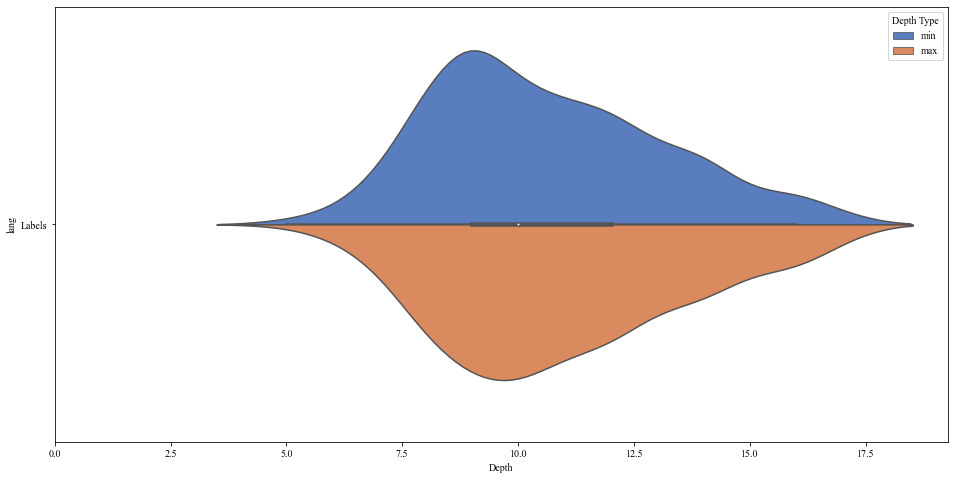

In [12]:
f, ax = plt.subplots(figsize=(16,8))
sns.violinplot(y="lang", x="Depth", hue="Depth Type", data=labels_df, palette="muted", split=True, ax=ax, orient="h")
ax.set_xlim(0)

### Entry-level Categories

In [13]:
# Get categories used by humans
new = list(set(df['Human-based (Mechanical Turk)']))
new[:4]

['lock', 'shed', 'fly', 'otter']

In [14]:
# There are WordNet collisions based on human descriptions
df[df['Human-based (Mechanical Turk)'] == 'lock']

,WNID,Input,Text-based,Human-based (Mechanical Turk)
206,n03075370,combination lock,lock,lock
322,n04136800,"sash fastener, sash lock, window lock",lock,lock


In [15]:
# (Manually) map human-based terms into correct WordNet meaning

new2wid = {
    'cot': '03114504-n',
    'dumpster': '03256032-n',
    'electric': '03271030-n',
    'brace': '02887209-n',
    'tank': '04390577-n',
    'bowling': '00041740-n',
    'kettle': '03612814-n',
    'tent': '04411264-n',
    'frog': '01639765-n',
    'shuffle': '00340463-n',
    'snow': '15043763-n',
    'violin': '04536866-n',
    'snake': '01726692-n',
    'swizzle': '07918706-n',
    'lotion': '03690938-n',
    'cable': '02934168-n',
    'van': '04520170-n',
    'airplane': '02691156-n',
    'matrix': '03730655-n',
    'church': '03028079-n',
    'cat': '02121620-n',
    'hat': '03497657-n',
    'train': '04468005-n',
    'duck': '01846331-n',
    'dress': '02728440-n',
    'castle': '02980441-n',
    'barrel': '02795169-n',
    'moth': '02283201-n',
    'hieroglyphic': '06362441-n',
    'sweeper': '02967782-n',
    'cranberry': '07743902-n',
    'piston': '03948950-n',
    'camera': '02942699-n',
    'house': '03544360-n',
    'pipe': '03944672-n',
    'cabbage': '07713895-n',
    'turtle': '01662784-n',
    'fence': '03327234-n',
    'fly': '02190166-n',
    'paint': '03875218-n',
    'tractor': '04465501-n',
    'organ': '03854065-n',
    'angle': '13887509-n',
    'hockey': '00463543-n',
    'harbor': '08639058-n',
    'butterfly': '02274259-n',
    'instrument': '03800933-n',
    'pick': '03929660-n',
    'plant': '00017222-n',
    'wheel': '04574999-n',
    'lemur': '02496913-n',
    'suit': '04350905-n',
    'watch': '00880662-n',
    'wrench': '4606574-n',
    'wagon': '02814533-n',
    'flag': '03354903-n',
    'tower': '04460130-n',
    'bridge': '02898711-n',
    'battery': '02810471-n',
    'statue': '04306847-n',
    'volleyball': '00480211-n',
    'lettuce': '11986306-n',
    'mouse': '02330245-n',
    'deer': '02430045-n',
    'apple': '07739125-n',
    'green': '07709333-n',
    'computer': '03082979-n',
    'pool': '00501080-n',
    'dashboard': '03163222-n',
    'net': '03352628-n',
    'mushroom': '07734744-n',
    'pope': '10453533-n',
    'light': '03665366-n',
    'vest': '04223299-n',
    'dishwasher': '03207941-n',
    'clothes': '02728440-n',
    'potpourri': '03992325-n',
    'drum': '03249569-n',
    'shuttle': '04264914-n',
    'stirrup': '04320973-n',
    'deoderant': '03176594-n',
    'spider': '01772222-n',
    'wine': '07891726-n',
    'phone': '04401088-n',
    'couch': '04256520-n',
    'fossil': '09284589-n',
    'cell': '00006484-n',
    'bed': '02818832-n',
    'cow': '01887787-n',
    'helmet': '03513137-n',
    'chalk': '03003091-n',
    'donkey': '02389559-n',
    'shrimp': '07794159-n',
    'loom': '03689157-n',
    'laboratory': '03629986-n',
    'skirt': '04230808-n',
    'gun': '02746365-n',
    'animal': '00015388-n',
    'vacuum': '04517823-n',
    'baby': '09827683-n',
    'piano': '03928116-n',
    'boot': '02872752-n',
    'monitor': '03782190-n',
    'dentures': '03176386-n',
    'shoe': '04199027-n',
    'plate': '03959485-n',
    'flower': '11669335-n',
    'engine': '03287733-n',
    'saw': '04140064-n',
    'stair': '04314914-n',
    'centipede': '01784675-n',
    'chimpanzee': '02481823-n',
    'bow': '00547765-n',
    'buckle': '02910353-n',
    'pottery': '00609868-n',
    'llama': '02437616-n',
    'scissors': '04148054-n',
    'hard': '03497657-n',
    'rodeo': '00522939-n',
    'smoker': '04246855-n',
    'palm': '12582231-n',
    'anteater': '01872401-n',
    'marker': '03721797-n',
    'electronics': '06099269-n',
    'squirrel': '02355227-n',
    'car': '02959942-n',
    'golf': '00464894-n',
    'truck': '04490091-n',
    'waterfall': '09475292-n',
    'baseball': '00474568-n',
    'glove': '03441112-n',
    'flannel': '03356982-n',
    'shed': '04187547-n',
    'hamster': '02342885-n',
    'pliers': '03966976-n',
    'seed': '11683989-n',
    'dome': '03220513-n',
    'level': '02788689-n',
    'jail': '03592245-n',
    'building': '02913152-n',
    'ship': '04194289-n',
    'resort': '08640531-n',
    'bug': '02236355-n',
    'gasket': '03423719-n',
    'orange': '07747607-n',
    'tiara': '04432203-n',
    'sitar': '04224842-n',
    'purse': '02774152-n',
    'crib': '03131574-n',
    'shovel': '04208210-n',
    'horse': '02374451-n',
    'bull': '01887623-n',
    'bone': '05269901-n',
    'monkey': '02484322-n',
    'baton': '02809736-n',
    'scanner': '04142731-n',
    'artichoke': '07718747-n',
    'missile': '03773504-n',
    'fruit': '13134947-n',
    'leaf': '13152742-n',
    'otter': '02444819-n',
    'people': '07942152-n',
    'fan': '03320046-n',
    'chest': '03014705-n',
    'brick': '02897820-n',
    'bag': '02773037-n',
    'birdie': '04212282-n',
    'cockpit': '03061505-n',
    'chain': '02999410-n',
    'dining': '00840517-n',
    'stocking': '01061029-n',
    'boat': '02858304-n',
    'stitch': '04321238-n',
    'guitar': '03467517-n',
    'shark': '01482330-n',
    'beanbag': '02816656-n',
    'baster': '02805283-n',
    'gauge': '03429288-n',
    'camouflage': '01049266-n',
    'sandbox': '04134523-n',
    'match': '03728982-n',
    'mattress': '03731164-n',
    'wood': '08438533-n',
    'lizard': '01674464-n',
    'microscope': '03760671-n',
    'sheep': '02411705-n',
    'ram': '02412080-n',
    'roof': '04105068-n',
    'fish': '02512053-n',
    'hawk': '01605630-n',
    'cart': '02970849-n',
    'tree': '13104059-n',
    'arch': '02733524-n',
    'knife': '03623556-n',
    'crab': '01976957-n',
    'color': '04674968-n',
    'telescope': '04403638-n',
    'hinge': '03521076-n',
    'clock': '03046257-n',
    'cape': '02955767-n',
    'glass': '04272054-n',
    'wok': '04596742-n',
    'ostrich': '01518878-n',
    'muzzle': '03803284-n',
    'bee': '02206856-n',
    'air': '06255354-n',
    'bottle': '02876657-n',
    'nut': '13136556-n',
    'squid': '01971280-n',
    'jacket': '03589791-n',
    'monument': '03743902-n',
    'door': '03221720-n',
    'scale': '04141838-n',
    'beach': '09217230-n',
    'dog': '02084071-n',
    'catapult': '02982232-n',
    'pants': '02854739-n',
    'copper': '04973669-n',
    'bear': '02131653-n',
    'shell': '01903756-n',
    'snorkel': '04251144-n',
    'theater': '04417809-n',
    'perfume': '03916031-n',
    'owl': '01621127-n',
    'mask': '03725035-n',
    'booth': '02874086-n',
    'pot': '03990474-n',
    'grill': '03459591-n',
    'easel': '03262809-n',
    'salamander': '01629276-n',
    'keyboard': '03614007-n',
    'horn': '03110669-n',
    'caterpillar': '02309337-n',
    'telephone': '04401088-n',
    'podium': '03159640-n',
    'lock': '03682487-n',
    'insect': '02159955-n',
    'bird': '01503061-n',
}

In [16]:
df.head()

,WNID,Input,Text-based,Human-based (Mechanical Turk)
1,n00444937,"snorkeling, snorkel diving",swimming,snorkel
2,n00446980,archery,archery,bow
3,n00466712,miniature golf,golf,golf
4,n00467536,"shuffleboard, shovelboard",game,shuffle
5,n00468299,"shinny, shinney",hockey,hockey


In [17]:
# Human-based
human_min_depths = []
human_max_depths = []
for ix, r in df.iterrows():
    wid = new2wid[r['Human-based (Mechanical Turk)']]
    syn = wn.synset_from_pos_and_offset('n', int(wid.split("-")[0]))
    human_min_depths.append(syn.min_depth())
    human_max_depths.append(syn.max_depth())

In [18]:
lang = "Humans"
human_df = pd.DataFrame()
human_df["lang"] = [lang] * (len(human_min_depths) + len(human_max_depths))
human_df["Depth Type"] = ["min"] * len(human_min_depths) + ["max"] * len(human_max_depths) 
human_df["Depth"] = human_min_depths + human_max_depths

(0.0, 17.970521192331102)

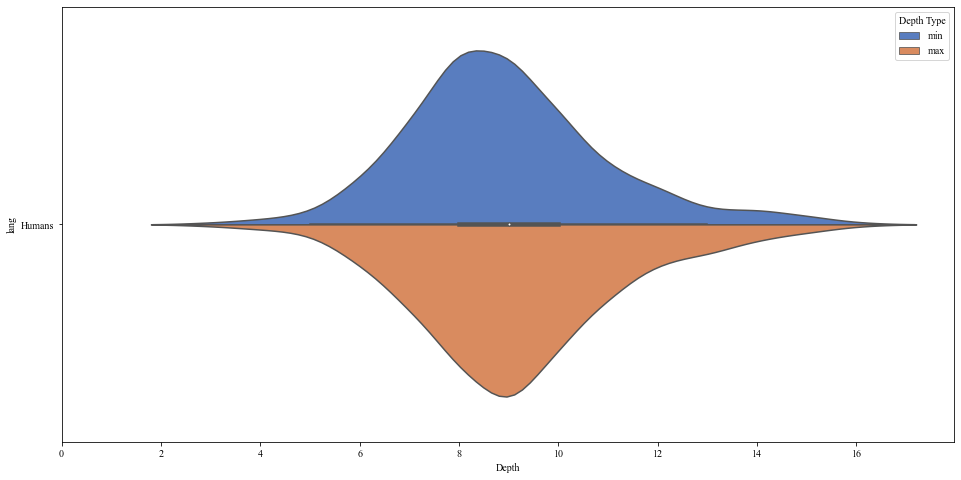

In [19]:
f, ax = plt.subplots(figsize=(16,8))
sns.violinplot(y="lang", x="Depth", hue="Depth Type", data=human_df, palette="muted", split=True, ax=ax, orient="h")
ax.set_xlim(0)

### Compare

In [20]:
all_df = labels_df
all_df = all_df.append(human_df)

<ipython-input-21-774709f48f41>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_anchor" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig("wordnet_depth.pdf", bbox_anchor="tight")


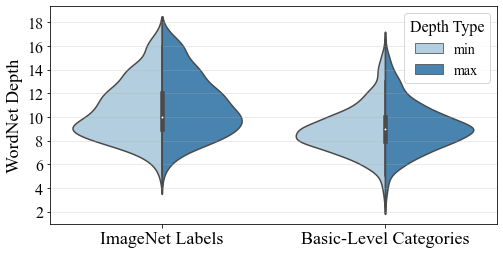

In [21]:
from matplotlib.ticker import MaxNLocator

f, ax = plt.subplots(figsize=(8,4))
sns.violinplot(x="lang", y="Depth", hue="Depth Type", data=all_df, palette="Blues", split=True, ax=ax, orient="v", inner='box')
ax.grid(axis='y', alpha=0.3)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel("", fontsize=18)
ax.set_ylabel("WordNet Depth", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xticklabels(["ImageNet Labels", "Basic-Level Categories"], fontsize=18)
ax.legend(title="Depth Type", title_fontsize=16, fontsize=14)

f.savefig("wordnet_depth.pdf", bbox_anchor="tight")